In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

df = pd.read_csv('diabetes_prediction_dataset.csv')
print(df.shape)
df.head()

df.info()

df.describe()

(100000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


How many cases are solved and rejected?

In [5]:
print(df['diabetes'].value_counts())

print(df['diabetes'].value_counts(normalize=True) * 100)

diabetes
0    91500
1     8500
Name: count, dtype: int64
diabetes
0    91.5
1     8.5
Name: proportion, dtype: float64


Split the data into training and testing sets

In [11]:
from sklearn.model_selection import train_test_split

# Отделяем X и y
X = df.drop(columns='diabetes')
y = df['diabetes']

# 2. Преобразуем категориальные признаки (например, gender)
X = pd.get_dummies(X, drop_first=True)

# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Проверим размеры
print(f"Train size: {X_train.shape[0]}")
print(f"Test size: {X_test.shape[0]}")


Train size: 80000
Test size: 20000


Model of digic regression since I have 2 possible results 0 and 1 (there is diabetes, there is no diabetes) and using StandardScaler() to speed up training

standardizing data with StandardScaler()

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 1. Стандартизация признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Только на train
X_test_scaled = scaler.transform(X_test)        # Применяем на test

# 2. Обучение модели логистической регрессии
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# 3. Предсказание
y_pred = model.predict(X_test_scaled)


In [13]:
X.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,False,False,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,True,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,True,False,True,False,False,False,False


Exercise 4: Model Evaluation Metrics

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

              precision    recall  f1-score   support

Not Diabetic       0.97      0.97      0.97     18300
    Diabetic       0.72      0.73      0.73      1700

    accuracy                           0.95     20000
   macro avg       0.85      0.85      0.85     20000
weighted avg       0.95      0.95      0.95     20000



<Figure size 600x500 with 0 Axes>

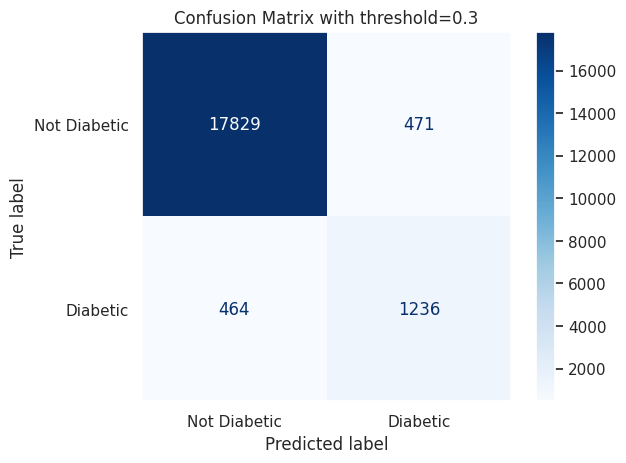

In [25]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Получаем вероятности принадлежности к классу "Diabetic"
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Устанавливаем новый порог
threshold = 0.3

# Создаем новые предсказания на основе нового порога
y_pred_new = (y_prob >= threshold).astype(int)

# Выводим отчет по классификации
print(classification_report(y_test, y_pred_new, target_names=['Not Diabetic', 'Diabetic']))

# Строим новую матрицу ошибок
cm_new = confusion_matrix(y_test, y_pred_new)
disp_new = ConfusionMatrixDisplay(confusion_matrix=cm_new, display_labels=['Not Diabetic', 'Diabetic'])

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 5))
disp_new.plot(cmap="Blues", values_format='d')
plt.title(f"Confusion Matrix with threshold={threshold}")
plt.grid(False)
plt.show()


metrics: precision, recall, f1

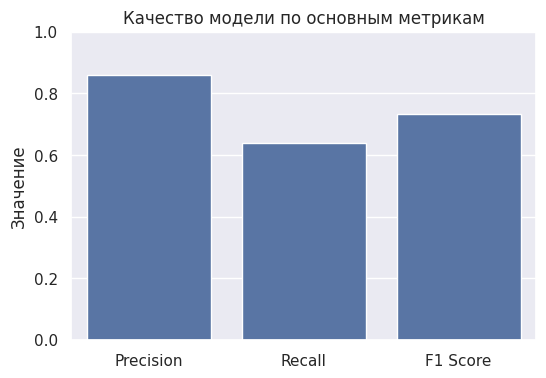

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = {'Precision': precision, 'Recall': recall, 'F1 Score': f1}

plt.figure(figsize=(6, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.ylim(0, 1)
plt.title("Качество модели по основным метрикам")
plt.ylabel("Значение")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


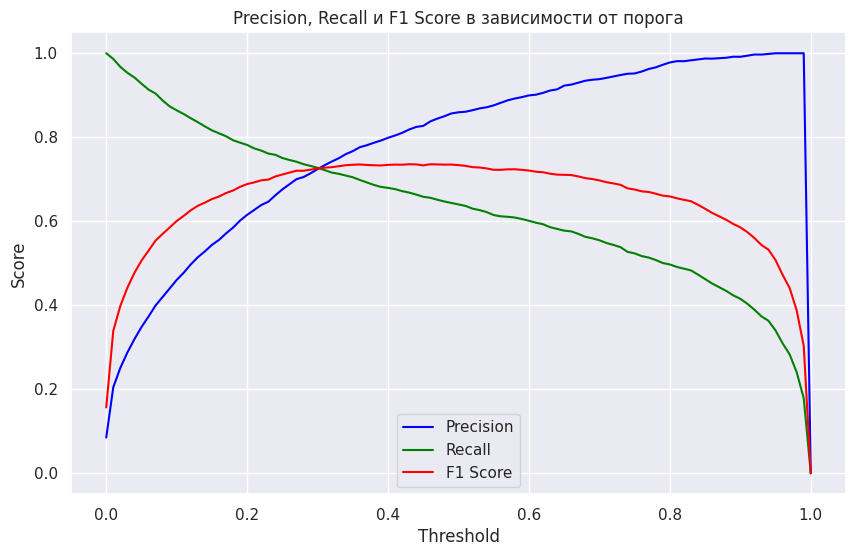

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Получаем вероятности положительного класса
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Диапазон порогов от 0 до 1 с шагом 0.01
thresholds = np.arange(0, 1.01, 0.01)

precisions = []
recalls = []
f1_scores = []

for thresh in thresholds:
    y_pred_thresh = (y_prob >= thresh).astype(int)
    precisions.append(precision_score(y_test, y_pred_thresh))
    recalls.append(recall_score(y_test, y_pred_thresh))
    f1_scores.append(f1_score(y_test, y_pred_thresh))

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='green')
plt.plot(thresholds, f1_scores, label='F1 Score', color='red')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall и F1 Score в зависимости от порога')
plt.legend()
plt.grid(True)
plt.show()


Exercise 5: Visualizing the performance of our model

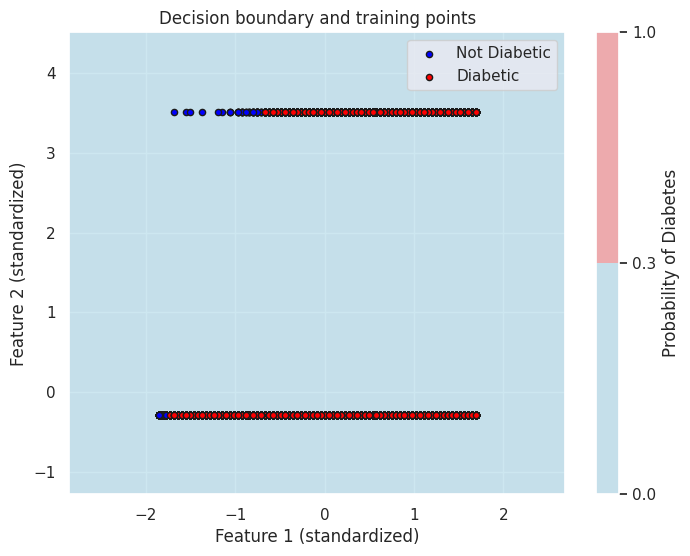

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Выбираем первые два признака из обучающей выборки (после стандартизации)
X_train_2d = X_train_scaled[:, :2]

# Создаем сетку значений
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Формируем матрицу признаков для предсказания (оставшиеся признаки заполняем нулями)
grid = np.c_[xx.ravel(), yy.ravel()]
# Нужно дополнить остальные признаки нулями, т.к. модель обучена на всех признаках
n_features = X_train_scaled.shape[1]
if n_features > 2:
    zeros = np.zeros((grid.shape[0], n_features - 2))
    grid_full = np.hstack([grid, zeros])
else:
    grid_full = grid

# Получаем вероятности класса "Diabetic"
probs = model.predict_proba(grid_full)[:, 1].reshape(xx.shape)

# Визуализация
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, probs, alpha=0.6, levels=[0, 0.3, 1], colors=['lightblue', 'lightcoral'])
plt.colorbar(label='Probability of Diabetes')

# Наносим тренировочные точки по двум признакам, цвет — класс
plt.scatter(X_train_2d[y_train==0, 0], X_train_2d[y_train==0, 1], c='blue', label='Not Diabetic', edgecolor='k', s=20)
plt.scatter(X_train_2d[y_train==1, 0], X_train_2d[y_train==1, 1], c='red', label='Diabetic', edgecolor='k', s=20)

plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.title('Decision boundary and training points')
plt.legend()
plt.show()


In [30]:
# Мы уже построили сетку и получили вероятности:
# probs — это массив вероятностей класса "Diabetic" для каждой точки сетки

print("Минимальная вероятность на сетке:", probs.min())
print("Максимальная вероятность на сетке:", probs.max())

# Можно вывести вероятность в центре области (пример)
center_x = (x_min + x_max) / 2
center_y = (y_min + y_max) / 2

# Находим индекс ближайшей точки сетки к центру
idx_x = (np.abs(xx[0] - center_x)).argmin()
idx_y = (np.abs(yy[:,0] - center_y)).argmin()

print(f"Вероятность диабета в центре сетки ({center_x:.2f}, {center_y:.2f}):", probs[idx_y, idx_x])

# Можно вывести еще пару примеров вероятностей для анализа
print(f"Вероятость диабета в левом нижнем углу ({x_min:.2f}, {y_min:.2f}):", probs[0,0])
print(f"Вероятость диабета в правом верхнем углу ({x_max:.2f}, {y_max:.2f}):", probs[-1,-1])


Минимальная вероятность на сетке: 0.00020227186233504467
Максимальная вероятность на сетке: 0.16263387122467016
Вероятность диабета в центре сетки (-0.08, 1.62): 0.0061590539940691875
Вероятость диабета в левом нижнем углу (-2.86, -1.28): 0.00020227186233504467
Вероятость диабета в правом верхнем углу (2.69, 4.52): 0.16263387122467016


choosing the two most important features:

In [31]:
import numpy as np
import pandas as pd

# Получаем коэффициенты модели (логистическая регрессия)
coefficients = model.coef_[0]  # массив коэффициентов для признаков

# Индексы двух признаков с наибольшим абсолютным значением коэффициента
top2_idx = np.argsort(np.abs(coefficients))[-2:]

print("Индексы двух важных признаков:", top2_idx)

# Названия признаков в X после get_dummies
feature_names = X.columns.tolist()

print("Два наиболее важных признака:")
print(feature_names[top2_idx[0]], feature_names[top2_idx[1]])


Индексы двух важных признаков: [5 4]
Два наиболее важных признака:
blood_glucose_level HbA1c_level


you can build a visualization as we did earlier, but using these two features:

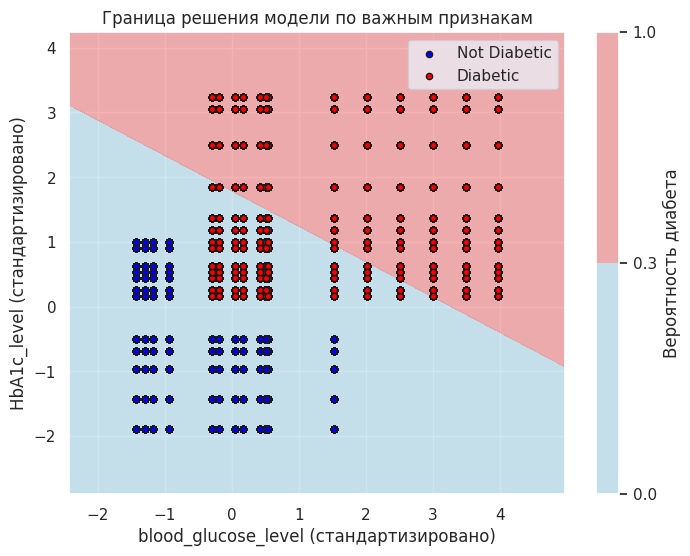

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Индексы важных признаков
top2_idx = [5, 4]

# Выбираем два важных признака из стандартизированных данных
X_train_2d = X_train_scaled[:, top2_idx]

# Определяем диапазон для сетки
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Создаем сетку признаков для предсказания, заполняем остальные признаки нулями
n_features = X_train_scaled.shape[1]
grid = np.zeros((xx.ravel().shape[0], n_features))
grid[:, top2_idx[0]] = xx.ravel()
grid[:, top2_idx[1]] = yy.ravel()

# Получаем вероятности диабета
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

# Визуализация
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, probs, alpha=0.6, levels=[0, 0.3, 1], colors=['lightblue', 'lightcoral'])
plt.colorbar(label='Вероятность диабета')

# Точки обучающей выборки по выбранным признакам
plt.scatter(X_train_2d[y_train == 0, 0], X_train_2d[y_train == 0, 1], c='blue', label='Not Diabetic', edgecolor='k', s=20)
plt.scatter(X_train_2d[y_train == 1, 0], X_train_2d[y_train == 1, 1], c='red', label='Diabetic', edgecolor='k', s=20)

plt.xlabel('blood_glucose_level (стандартизировано)')
plt.ylabel('HbA1c_level (стандартизировано)')
plt.title('Граница решения модели по важным признакам')
plt.legend()
plt.show()


 Exercise 6 : ROC Curve

AUC: 0.9625


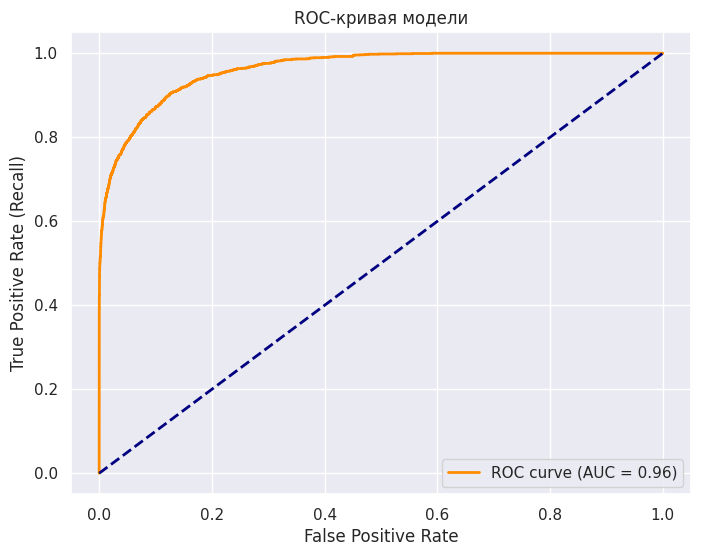

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

# Получаем вероятности принадлежности к классу "Diabetic"
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.4f}")

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC-кривая модели')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [34]:
# Выведем таблицу из fpr, tpr, thresholds
roc_data = pd.DataFrame({
    'Threshold': thresholds,
    'True Positive Rate (Recall)': tpr,
    'False Positive Rate': fpr
})

roc_data = roc_data.sort_values(by='Threshold', ascending=False)
roc_data.head(10)  # можно также .tail(10) посмотреть пороги ближе к 0


,Threshold,True Positive Rate (Recall),False Positive Rate
0,inf,0.000000,0.000000
1,0.999992,0.000588,0.000000
2,0.944733,0.351765,0.000000
3,0.944394,0.351765,0.000055
4,0.939818,0.363529,0.000055
5,0.939398,0.363529,0.000109
6,0.918017,0.392941,0.000109
7,0.918006,0.392941,0.000164
8,0.915441,0.395294,0.000164
9,0.915432,0.395294,0.000219


In [35]:
youden_index = tpr - fpr
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]
print(f"Оптимальный порог по критерию Youden's J: {optimal_threshold:.3f}")


Оптимальный порог по критерию Youden's J: 0.070


              precision    recall  f1-score   support

Not Diabetic       0.99      0.87      0.93     18300
    Diabetic       0.40      0.90      0.55      1700

    accuracy                           0.88     20000
   macro avg       0.70      0.89      0.74     20000
weighted avg       0.94      0.88      0.90     20000



<Figure size 600x500 with 0 Axes>

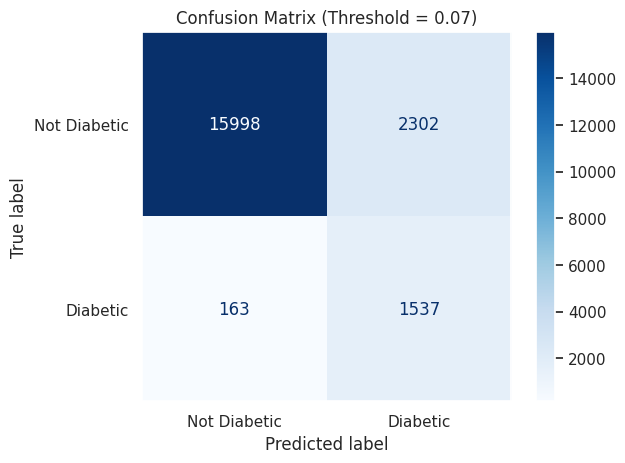

In [36]:
y_pred_youden = (y_prob >= optimal_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred_youden, target_names=['Not Diabetic', 'Diabetic']))

cm_youden = confusion_matrix(y_test, y_pred_youden)
disp_youden = ConfusionMatrixDisplay(confusion_matrix=cm_youden, display_labels=['Not Diabetic', 'Diabetic'])

plt.figure(figsize=(6, 5))
disp_youden.plot(cmap="Blues", values_format='d')
plt.title(f"Confusion Matrix (Threshold = {optimal_threshold:.2f})")
plt.grid(False)
plt.show()
